In [38]:
import os
from tpot.tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from test_utils import extract_labels, get_optimizer, create_dirs


import pandas as pd
 # This is done based on the dataset ID.
#dataset = openml.datasets.get_dataset(1164)
#dataset = openml.datasets.get_dataset(1164)
dataset = pd.read_csv("/Users/matsumoton/Documents/anges_cad_1_train.csv",sep=",")
y_train = dataset['target']
X_train = dataset.drop(['target'],axis=1)

test_dataset = pd.read_csv("/Users/matsumoton/Documents/anges_cad_1_test.csv",sep=",")
y_test = test_dataset['target']
X_test = test_dataset.drop(['target'],axis=1)


ModuleNotFoundError: No module named 'test_utils'

In [3]:
import os
os.getcwd()

'/Users/matsumoton/Library/CloudStorage/Box-Box/tpot_benchmark_data/anges'

In [4]:
TPOTClassifier

NameError: name 'TPOTClassifier' is not defined

In [2]:

#X_train, X_test, y_train, y_test = train_test_split(dataset, y, train_size=0.8)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)

#test_img = X_test
#train_img = X_train
#from sklearn.decomposition import PCA
#pca = PCA(svd_solver='randomized', iterated_power= 5)
#pca = PCA(n_components = train_img.shape[0])
#pca.fit(train_img)
#train_img = pca.transform(train_img)
#test_img = pca.transform(test_img)

#digits = load_digits()
#X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,train_size=0.75, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


#tpot.dump_fitness_tracker('digen25.csv')



(696, 101) (232, 101) (696,) (232,)


In [2]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(696, 101) (232, 101) (696,) (232,)


In [ ]:

for run_id in range(31,40):
        # tpot = TPOTClassifier(verbosity=2, max_time_mins=5, population_size=40)
        tpot = TPOTClassifier(verbosity=2, population_size=100, offspring_size=50, generations=50, track_fitnesses=True,
                track_generations=True, resource_logging=True, test_x = X_test, test_y = y_test, scoring="balanced_accuracy",cv=10) 
        #tpot.fit(X_train, y_train)
        tpot.fit(X_train, y_train)
        tpot.dump_fitness_tracker(f"/Users/matsumoton/pareto/anges_baseline_{run_id}_fitness.csv")
        tpot.dump_pareto_fitness_tracker(f"/Users/matsumoton/pareto/anges_baseline_{run_id}_pareto_fitness.csv")
        tpot.dump_primitives_mutations(f"/Users/matsumoton/pareto/anges_baseline_{run_id}_mutation_rates.csv")
        print(tpot.score(X_test, y_test))

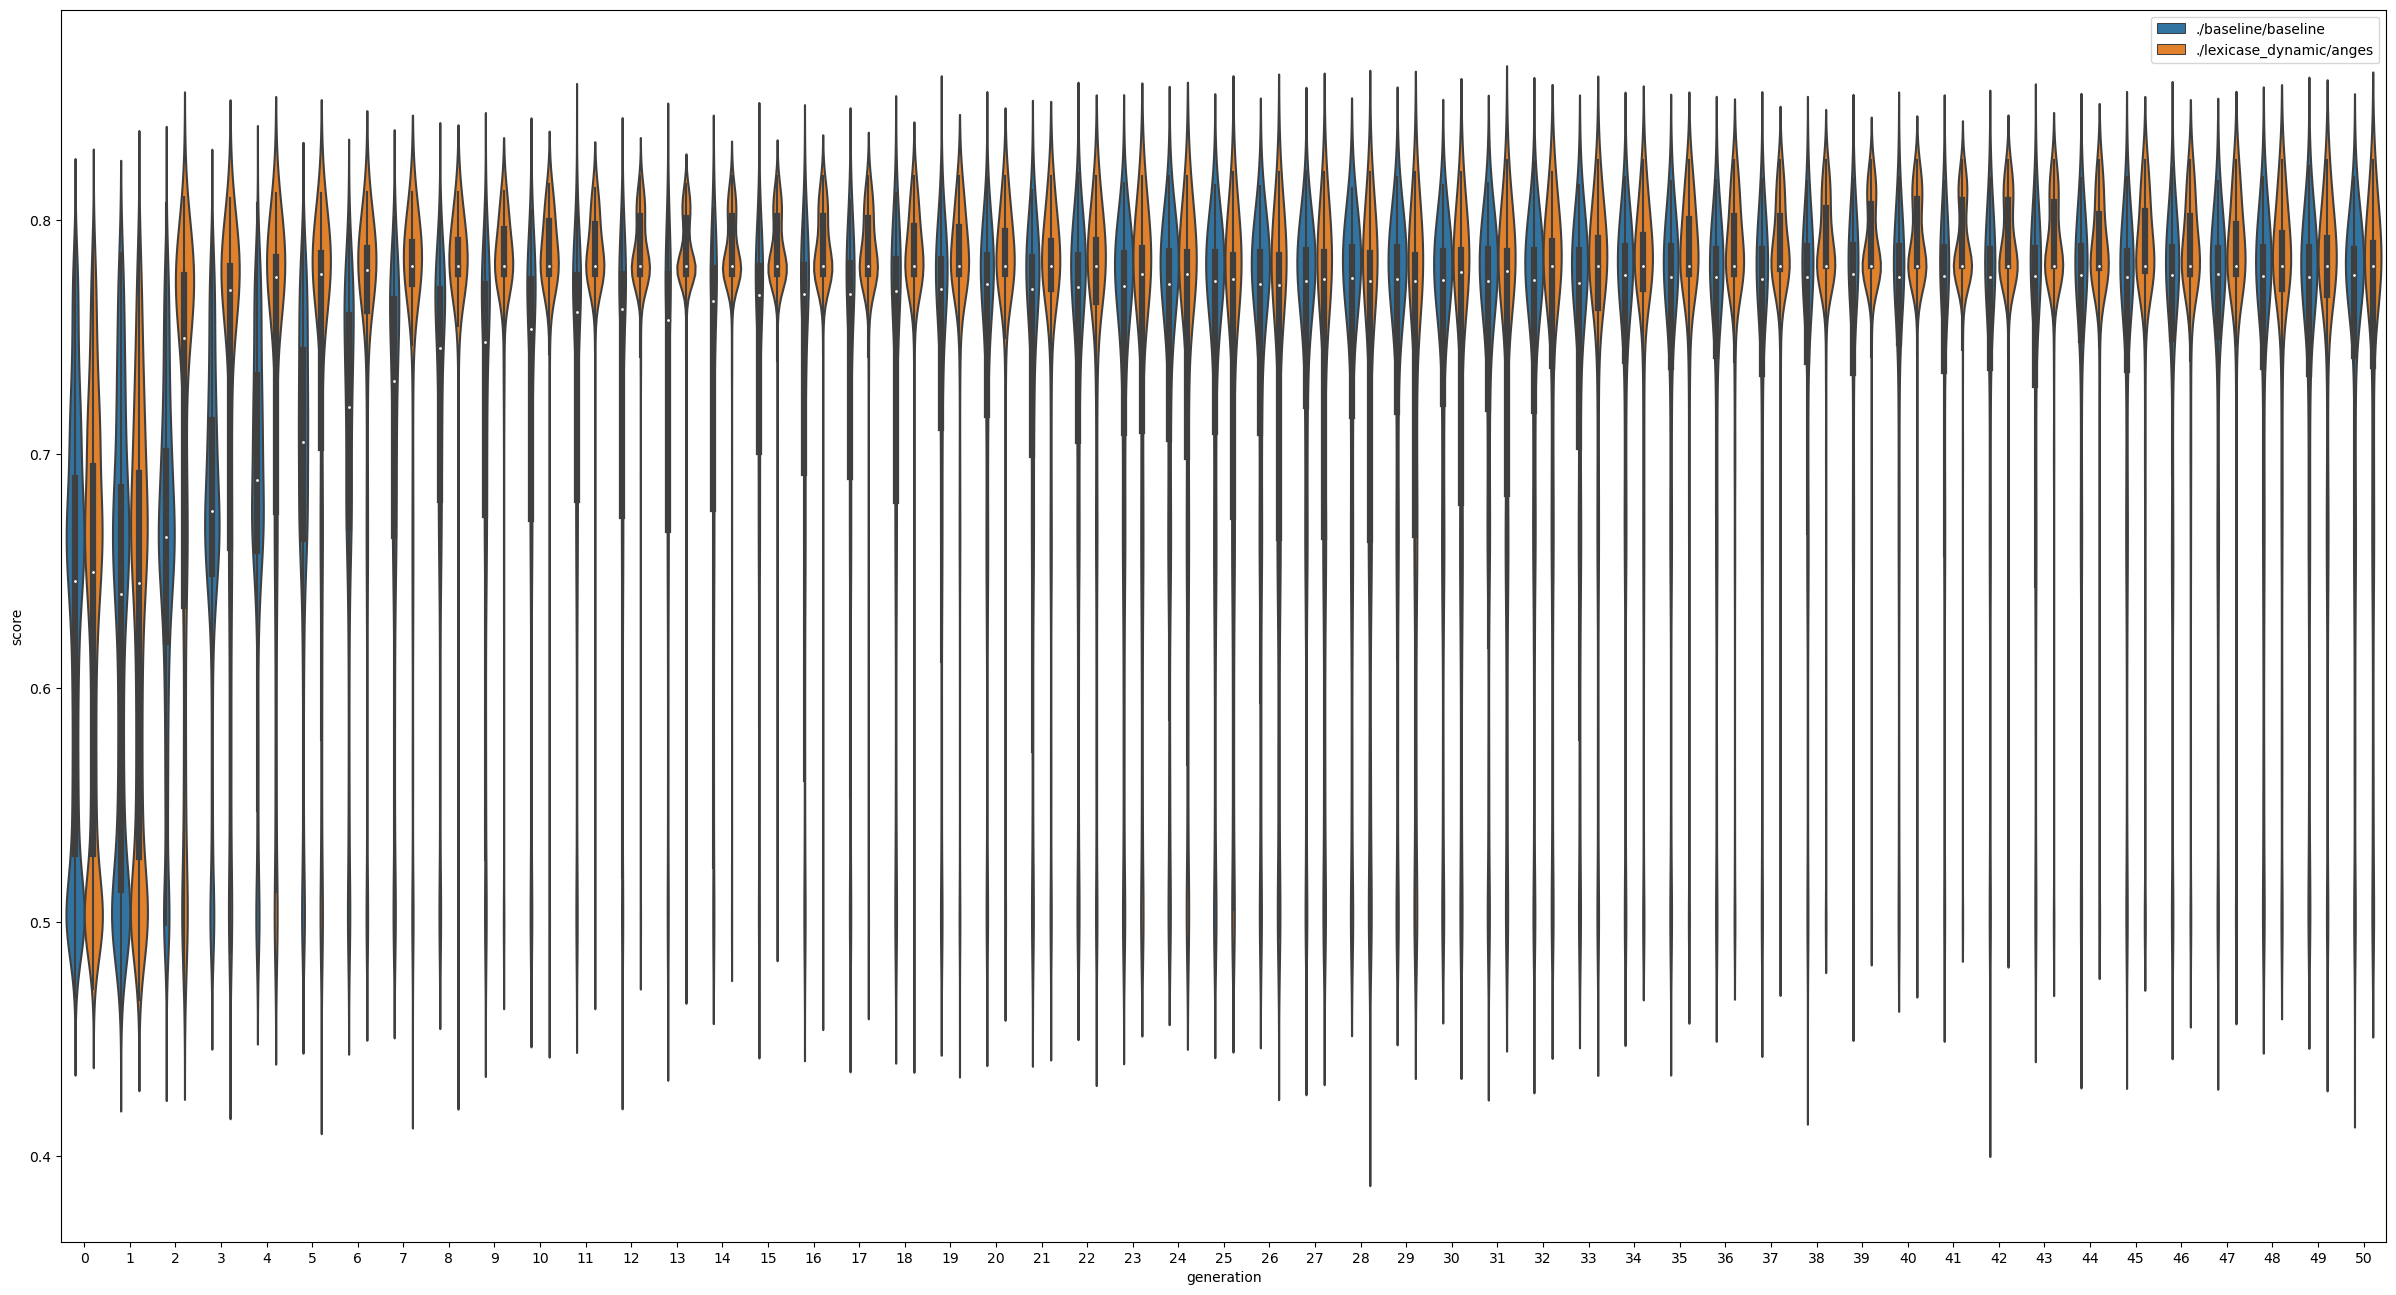

'\noperator count table\nfor directoryev in directoryevs:\n    print(directoryev)\n    for i in range(0,generation_num):\n        print(str(i) + \' \' + str(np.mean(frame_df.loc[(frame_df[\'generation\']==i) & (frame_df["type"] == directoryev),\'operator_count\'])) + \' \' + str(np.median(frame_df.loc[(frame_df[\'generation\']==i) & (frame_df["type"] == directoryev),\'operator_count\'])))\n'

In [10]:
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import statistics
import pandas as pd
plt.rcParams["figure.figsize"] = (30,16)

directoryevs = ["./baseline/baseline","./lexicase_dynamic/anges"]

upper_quantile_only = False

generation_num = 50
total_runs = 40

ev = []
for directoryev in directoryevs:
    temp_ev = []
    for i in range(total_runs):
        ev_df_name = f"{directoryev}_{i}_fitness.csv"
        if not exists(ev_df_name):
            continue
        fitness_df = pd.read_csv(ev_df_name, sep=',')
        fitness_df = fitness_df[~fitness_df.isin([np.nan, np.inf, -np.inf]).any(1)]
        if upper_quantile_only:
            high_quantile= []
            for g in range(0,generation_num):
                upper_quantile = np.quantile(fitness_df.loc[fitness_df['generation']==g,'score'],0.99)
                high_quantile.append(fitness_df.loc[(fitness_df['generation']==g) & (fitness_df['score'] >= upper_quantile)])
            fitness_df = pd.concat(high_quantile)
            
        temp_ev.append(fitness_df)

    temp_ev = pd.concat(temp_ev)
    temp_ev["type"] = directoryev
    ev.append(temp_ev)
frame_df = pd.concat(ev)
frame_df = frame_df[~frame_df.isin([np.nan, np.inf, -np.inf]).any(1)]
seaborn.violinplot(x="generation",y="score",hue="type",data=frame_df, label = "type" if i == 0 else "")
plt.legend()
plt.show()

'''
operator count table
for directoryev in directoryevs:
    print(directoryev)
    for i in range(0,generation_num):
        print(str(i) + ' ' + str(np.mean(frame_df.loc[(frame_df['generation']==i) & (frame_df["type"] == directoryev),'operator_count'])) + ' ' + str(np.median(frame_df.loc[(frame_df['generation']==i) & (frame_df["type"] == directoryev),'operator_count'])))
'''


./baseline/baseline
29
                                             pipeline  cv_score  generation  \
97  GaussianNB(GradientBoostingClassifier(MLPClass...  0.819435          28   

    holdout_score  holdout_roc_auc_score  
97       0.796713               0.819363  
97    1.616148
dtype: float64


ValueError: No objects to concatenate

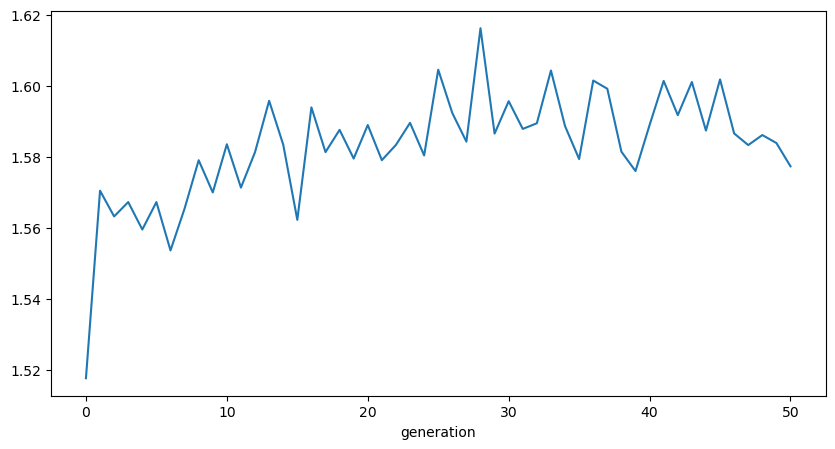

In [2]:
#analyze pareto quality
#change quantile_num to determine best performance across all runs
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import statistics
import pandas as pd

plt.rcParams["figure.figsize"] = (10,5)


directoryevs = ["./baseline/baseline","./lexicase_dynamic/anges"]
quantile_num = 0.999999

generation_num = 50
total_runs = 40


ev = []
for directoryev in directoryevs:
    temp_ev = []
    for i in range(40):
        ev_df_name = f"{directoryev}_{i}_pareto_fitness.csv"
        #ev_df_name = f"/Users/matsumoton/Git/results_pop40_gen20_{directoryev}/pareto_fitnesses/digen{j}_run_{i}_evolution_pop40_gen20.csv"
        if not exists(ev_df_name):
            continue
        fitness_df = pd.read_csv(ev_df_name, sep=',')
        fitness_df = fitness_df[~fitness_df.isin([np.nan, np.inf, -np.inf]).any(1)]
        temp = (fitness_df[fitness_df["holdout_score"]>0.79])
        if len(temp) > 0:
            print(directoryev)
            print(i)
            print(temp)
            print(temp["holdout_score"] + temp["cv_score"])
            
        temp_ev.append(fitness_df)

    temp_ev = pd.concat(temp_ev)
    #print(fitness_df.iloc(fitness_df[fitness_df["holdout_score"] > 0.8]))
    temp_ev["score_diff"] = abs(temp_ev["cv_score"]-temp_ev["holdout_score"])
    temp_ev["abs_score_diff"] = abs(temp_ev["cv_score"]-temp_ev["holdout_score"])
    temp_ev["total_score"] = temp_ev["cv_score"]+temp_ev["holdout_score"]

    
    #print(directoryev)
    #print(temp_ev.groupby("generation")["score_diff"].mean())
    #temp_ev2 = temp_ev.groupby("generation")["score_diff"].quantile(quantile_num)
    #temp_ev2 = temp_ev.groupby("generation")["cv_score"].quantile(quantile_num)
    #temp_ev2 = temp_ev.groupby("generation")["holdout_score"].quantile(quantile_num)
    temp_ev2 = temp_ev.groupby("generation")["total_score"].quantile(quantile_num)
    temp_ev2.plot()
    #ev.append(temp_ev)
#frame_df = pd.concat(ev)
#plt.savefig(f"/Users/matsumoton/Git/meta_pop40_gen15/gen_fitnesses/digen{j}_pop40_gen15_pareto_diff.png")

plt.show()





In [16]:
temp_ev

generation
0     0.062301
1     0.064759
2     0.072516
3     0.075344
4     0.075502
5     0.077304
6     0.077666
7     0.078532
8     0.078551
9     0.079501
10    0.077621
11    0.079612
12    0.079796
13    0.079301
14    0.079198
15    0.079205
16    0.080877
17    0.079766
18    0.080643
19    0.081116
20    0.079852
21    0.080428
22    0.080379
23    0.081593
24    0.081452
25    0.081352
26    0.082788
27    0.084082
28    0.085022
29    0.084055
30    0.084812
31    0.085700
32    0.085285
33    0.085125
34    0.085502
35    0.083745
36    0.084887
37    0.085112
38    0.084340
39    0.084425
40    0.085019
41    0.083745
42    0.086216
43    0.085911
44    0.084260
45    0.084801
46    0.085173
47    0.084548
48    0.085009
49    0.084919
50    0.086537
Name: score_diff, dtype: float64

In [ ]:
#analyze pareto quality
#change quantile_num to determine best performance across all runs
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import statistics
import pandas as pd

plt.rcParams["figure.figsize"] = (10,5)


directoryevs = ["./baseline/baseline","./lexicase_dynamic/anges"]
quantile_num = 0.999999

generation_num = 50
total_runs = 40


ev = []
for directoryev in directoryevs:
    temp_ev = []
    for i in range(40):
        ev_df_name = f"{directoryev}_{i}_pareto_fitness.csv"
        #ev_df_name = f"/Users/matsumoton/Git/results_pop40_gen20_{directoryev}/pareto_fitnesses/digen{j}_run_{i}_evolution_pop40_gen20.csv"
        if not exists(ev_df_name):
            continue
        fitness_df = pd.read_csv(ev_df_name, sep=',')
        fitness_df = fitness_df[~fitness_df.isin([np.nan, np.inf, -np.inf]).any(1)]
        temp = (fitness_df[fitness_df["holdout_score"]>0.79])
        if len(temp) > 0:
            print(directoryev)
            print(i)
            print(temp)
            print(temp["holdout_score"] + temp["cv_score"])
            
        temp_ev.append(fitness_df)

    temp_ev = pd.concat(temp_ev)
    #print(fitness_df.iloc(fitness_df[fitness_df["holdout_score"] > 0.8]))
    temp_ev["score_diff"] = abs(temp_ev["cv_score"]-temp_ev["holdout_score"])
    temp_ev["abs_score_diff"] = abs(temp_ev["cv_score"]-temp_ev["holdout_score"])
    temp_ev["total_score"] = temp_ev["cv_score"]+temp_ev["holdout_score"]

    
    #print(directoryev)
    #print(temp_ev.groupby("generation")["score_diff"].mean())
    #temp_ev2 = temp_ev.groupby("generation")["score_diff"].quantile(quantile_num)
    #temp_ev2 = temp_ev.groupby("generation")["cv_score"].quantile(quantile_num)
    #temp_ev2 = temp_ev.groupby("generation")["holdout_score"].quantile(quantile_num)
    temp_ev2 = temp_ev.groupby("generation")["total_score"].quantile(quantile_num)
    temp_ev2.plot()
    #ev.append(temp_ev)
#frame_df = pd.concat(ev)
#plt.savefig(f"/Users/matsumoton/Git/meta_pop40_gen15/gen_fitnesses/digen{j}_pop40_gen15_pareto_diff.png")

plt.show()



